In [1]:
import numpy as np

def lambda_sum(w, lambd):
    return np.mean(lambd * w ** 2) / 2

class ActivationManager():
    def activate(self, z):
        pass

    def derivate(self, a):
        pass

    def cost(self, predictions, truth, w=None, lambd=None):
        pass


class SigmoidActivator(ActivationManager):
    def activate(self, z):
        return 1 / (1 + np.exp(-z))

    def derivate(self, a):
        return a * (1-a)

    def cost(self, predictions, truth, w=None, lambd=None):
        # if np.any(f == 1) or np.any(f == 0):
        # return "NAN"
        a = truth * np.log(predictions)
        b = (1 - truth) * np.log(1 - predictions)
        result = -np.mean(a+b)
        if w and lambd:
            result += lambda_sum(w, lambd)
        return result


class LinearActivator(ActivationManager):
    def activate(self, z):
        return z

    def cost(self, predictions, truth, w=None, lambd=None):
        result = np.mean((predictions - truth)**2) / 2
        if w and lambd:
            result += lambda_sum(w, lambd)
        return result

    def derivate(self, a):
        return 1


training_data = np.array([
    [0, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 1]
])  
x_train = training_data[:, 0:3]
y_train = training_data[:, 3:]

np.random.seed(1)

w1 = 2 * np.random.random((3, 5)) - 1
w2 = 2 * np.random.random((5, 1)) - 1

activator1 = SigmoidActivator()
activator2 = SigmoidActivator()
z1 = np.dot(x_train, w1)
a1 = activator1.activate(z1)
z2 = np.dot(a1, w2)
a2 = activator2.activate(z2)
e2 = a2 - y_train

np.set_printoptions(precision=8, suppress=True)
print("W1:")
print(w1)
print("W2:")
print(w2)
print("ERROR:")
print(e2)
print("COST:")
print(activator2.cost(a2, y_train))

W1:
[[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822]
 [-0.81532281 -0.62747958 -0.30887855 -0.20646505  0.07763347]
 [-0.16161097  0.370439   -0.5910955   0.75623487 -0.94522481]]
W2:
[[ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]
 [-0.71922612]
 [-0.60379702]]
ERROR:
[[ 0.37401057]
 [ 0.36407664]
 [ 0.36829928]
 [ 0.35903039]
 [-0.5990763 ]
 [-0.6160442 ]
 [-0.60386901]
 [-0.61857754]]
COST:
0.6982852273376398


In [2]:
costs = []
for i in range(10000):
    z1 = np.dot(x_train, w1)
    a1 = activator1.activate(z1)
    z2 = np.dot(a1, w2)
    a2 = activator2.activate(z2)

    costs.append(activator2.cost(a2, y_train))

    e2 = a2 - y_train
    g2 = e2 * activator2.derivate(a2)
    e1 = np.dot(g2, w2.T)
    g1 = e1 * activator1.derivate(a1)

    gw2 = np.dot(a1.T, g2)
    gw1 = np.dot(x_train.T, g1)

    w2 -= gw2
    w1 -= gw1

print("W1:")
print(w1)
print("W2:")
print(w2)
print("ERROR:")
print(e2)
print("COST:")
print(costs[-1])

W1:
[[ 2.81046414  3.12207706 -2.77364895 -3.80383604 -3.47954034]
 [-0.24974628 -0.38502157 -0.09585878  0.10552988  0.44435863]
 [-0.04044714 -0.01531159 -0.12161085  0.80911134  0.09980332]]
W2:
[[ 2.94652147]
 [ 3.55033955]
 [-4.3928055 ]
 [-5.91727842]
 [-5.55252218]]
ERROR:
[[ 0.00916803]
 [ 0.00282371]
 [ 0.00284012]
 [ 0.00090099]
 [-0.00358801]
 [-0.00416876]
 [-0.00433748]
 [-0.00518665]]
COST:
0.004137822030140665


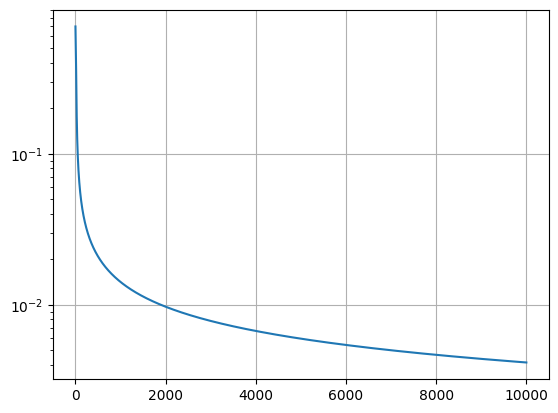

In [3]:
from matplotlib import pyplot as plt
plt.plot(costs)
plt.yscale('log')
plt.grid(True)
plt.show()